In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

633

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kahului
Processing Record 2 of Set 1 | nome
Processing Record 3 of Set 1 | esperance
Processing Record 4 of Set 1 | zhigansk
Processing Record 5 of Set 1 | bambous virieux
Processing Record 6 of Set 1 | kota kinabalu
Processing Record 7 of Set 1 | codrington
Processing Record 8 of Set 1 | barrow
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | carnarvon
Processing Record 11 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 12 of Set 1 | faanui
Processing Record 13 of Set 1 | cape town
Processing Record 14 of Set 1 | avarua
Processing Record 15 of Set 1 | ribeira grande
Processing Record 16 of Set 1 | sandpoint
Processing Record 17 of Set 1 | hithadhoo
Processing Record 18 of Set 1 | tapaua
City not found. Skipping...
Processing Record 19 of Set 1 | lorengau
Processing Record 20 of Set 1 | vaini
Processing Record 21 of Set 1 | arraial do cabo
Processi

Processing Record 38 of Set 4 | ust-ilimsk
Processing Record 39 of Set 4 | marataizes
Processing Record 40 of Set 4 | moshupa
Processing Record 41 of Set 4 | evensk
Processing Record 42 of Set 4 | vostok
Processing Record 43 of Set 4 | bilibino
Processing Record 44 of Set 4 | arroyo
Processing Record 45 of Set 4 | najran
Processing Record 46 of Set 4 | kenai
Processing Record 47 of Set 4 | guerrero negro
Processing Record 48 of Set 4 | marcona
City not found. Skipping...
Processing Record 49 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 50 of Set 4 | mandalgovi
Processing Record 1 of Set 5 | norman wells
Processing Record 2 of Set 5 | chake chake
Processing Record 3 of Set 5 | toamasina
Processing Record 4 of Set 5 | port elizabeth
Processing Record 5 of Set 5 | araouane
Processing Record 6 of Set 5 | acapulco
Processing Record 7 of Set 5 | ahipara
Processing Record 8 of Set 5 | camana
Processing Record 9 of Set 5 | port lincoln
Processing Record 10 of Set 5 | ma

Processing Record 30 of Set 8 | ghoti
Processing Record 31 of Set 8 | ayia galini
Processing Record 32 of Set 8 | starkville
Processing Record 33 of Set 8 | santa luzia
Processing Record 34 of Set 8 | cortland
Processing Record 35 of Set 8 | khandwa
Processing Record 36 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 37 of Set 8 | saint george
Processing Record 38 of Set 8 | tshikapa
Processing Record 39 of Set 8 | crixas
Processing Record 40 of Set 8 | ilulissat
Processing Record 41 of Set 8 | kieta
Processing Record 42 of Set 8 | adeje
Processing Record 43 of Set 8 | bonavista
Processing Record 44 of Set 8 | kampene
Processing Record 45 of Set 8 | bozoum
Processing Record 46 of Set 8 | dharmadam
Processing Record 47 of Set 8 | muscat
Processing Record 48 of Set 8 | beian
Processing Record 49 of Set 8 | temaraia
City not found. Skipping...
Processing Record 50 of Set 8 | honningsvag
Processing Record 1 of Set 9 | aasiaat
Processing Record 2 of Set 9 | husavik
Processi

Processing Record 19 of Set 12 | yulara
Processing Record 20 of Set 12 | krasnyy chikoy
Processing Record 21 of Set 12 | henties bay
Processing Record 22 of Set 12 | kaduy
Processing Record 23 of Set 12 | the valley
Processing Record 24 of Set 12 | aswan
Processing Record 25 of Set 12 | samalaeulu
City not found. Skipping...
Processing Record 26 of Set 12 | hofn
Processing Record 27 of Set 12 | artyshta
Processing Record 28 of Set 12 | aquiraz
Processing Record 29 of Set 12 | sibu
Processing Record 30 of Set 12 | presidencia roque saenz pena
Processing Record 31 of Set 12 | seoul
Processing Record 32 of Set 12 | conceicao da barra
Processing Record 33 of Set 12 | saint-ambroise
Processing Record 34 of Set 12 | aykino
Processing Record 35 of Set 12 | kasempa
Processing Record 36 of Set 12 | santa cruz
Processing Record 37 of Set 12 | nago
Processing Record 38 of Set 12 | dunda
Processing Record 39 of Set 12 | canchungo
Processing Record 40 of Set 12 | hanyang
Processing Record 41 of Set

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kahului,20.8947,-156.4700,82.42,44,20,13.00,US,2022-05-09 20:10:47
1,Nome,64.5011,-165.4064,32.16,74,40,16.11,US,2022-05-09 20:06:51
2,Esperance,-33.8667,121.9000,61.56,44,10,14.47,AU,2022-05-09 20:10:47
3,Zhigansk,66.7697,123.3711,7.70,92,12,8.03,RU,2022-05-09 20:10:48
4,Bambous Virieux,-20.3428,57.7575,74.21,94,40,1.14,MU,2022-05-09 20:06:45
5,Kota Kinabalu,5.9749,116.0724,75.18,100,20,3.44,MY,2022-05-09 20:10:48
6,Codrington,-38.2667,141.9667,44.67,82,8,5.88,AU,2022-05-09 20:10:49
7,Barrow,71.2906,-156.7887,30.22,93,100,8.05,US,2022-05-09 20:10:49
8,Punta Arenas,-53.1500,-70.9167,48.22,76,20,26.46,CL,2022-05-09 20:10:50
9,Carnarvon,-24.8667,113.6333,66.27,68,97,8.05,AU,2022-05-09 20:10:50


In [8]:
# update column order
new_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed",]
city_data_df = city_data_df[new_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kahului,US,2022-05-09 20:10:47,20.8947,-156.4700,82.42,44,20,13.00
1,Nome,US,2022-05-09 20:06:51,64.5011,-165.4064,32.16,74,40,16.11
2,Esperance,AU,2022-05-09 20:10:47,-33.8667,121.9000,61.56,44,10,14.47
3,Zhigansk,RU,2022-05-09 20:10:48,66.7697,123.3711,7.70,92,12,8.03
4,Bambous Virieux,MU,2022-05-09 20:06:45,-20.3428,57.7575,74.21,94,40,1.14


In [9]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [10]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

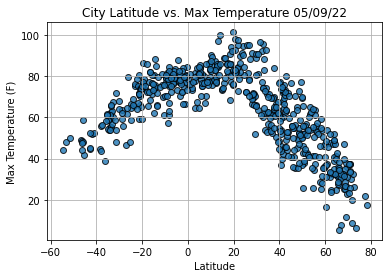

In [11]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

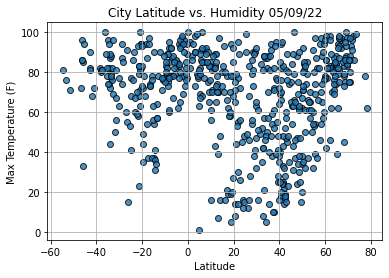

In [12]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

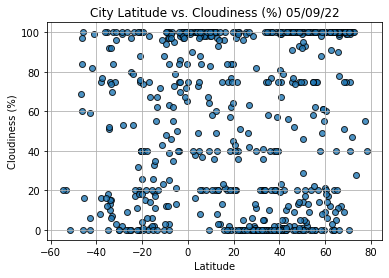

In [13]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

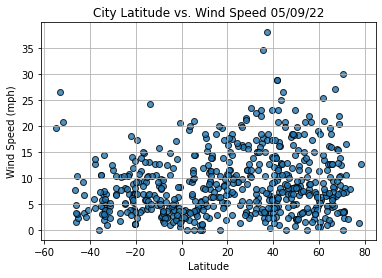

In [14]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()